In [304]:
# Read in data from 'bank-additional-full.csv'.
import pandas as pd

df = pd.read_csv("./bank-additional-full.csv", delimiter = ";")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [305]:
# Prepare the data.

# 1. Convert to dummies (convert categorical variables into
# dummy/indicator values).

df_dummies = pd.get_dummies(df)
df_dummies.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_no,y_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0


In [306]:
# 2. Delete columns 'y_no' and 'duration'.

del df_dummies['duration']
del df_dummies['y_no']
df_dummies.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_yes
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,1,0,0,0,0,1,0,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,1,0,0,0,0,1,0,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,1,0,0,0,0,1,0,0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,...,0,0,1,0,0,0,0,1,0,0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,1,0,0,0,0,1,0,0


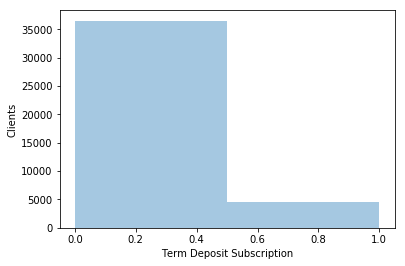

In [307]:
# Plot histogram of the label 'y_yes'.

import seaborn as sns
y_df = df_dummies.iloc[:,-1]

plt = sns.distplot(y_df, bins=2, kde=False, rug=False).get_figure()
axes = plt.gca()
axes.set_xlabel('Term Deposit Subscription')
axes.set_ylabel('Clients')
plt.savefig('fig.png', bbox_inches='tight')

In [308]:
# Get the features from the data set.

X = df_dummies.iloc[:, 0:-1].values
y = y_df.values.T

#X_df.head()
print('X: ')
print(X)
print('y: ')
print(y)

X: 
[[ 56.   1. 999. ...   0.   1.   0.]
 [ 57.   1. 999. ...   0.   1.   0.]
 [ 37.   1. 999. ...   0.   1.   0.]
 ...
 [ 56.   2. 999. ...   0.   1.   0.]
 [ 44.   1. 999. ...   0.   1.   0.]
 [ 74.   3. 999. ...   1.   0.   0.]]
y: 
[0 0 0 ... 0 1 0]


In [309]:
# Create and run a classifier.

from sklearn.ensemble import ExtraTreesClassifier

clf = ExtraTreesClassifier(n_estimators=100, random_state=0)
clf.fit(X, y)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [310]:
# Report the results of 10-fold stratified cross validation.

from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error

# 'When the cv argument is an integer, cross_val_score uses the KFold or
# StratifiedKFold strategies by default.'
scores = cross_val_score(clf, X, y, cv=10, scoring=make_scorer(mean_squared_error))
print("MSE: %0.8f (+/- %0.8f)" % (scores.mean(), scores.std()))

MSE: 0.47422338 (+/- 0.25305634)


1. age (0.157143)
2. campaign (0.104946)
3. euribor3m (0.097781)
4. pdays (0.040962)
5. nr.employed (0.038909)
6. poutcome_success (0.028999)
7. emp.var.rate (0.027201)
8. housing_no (0.020429)
9. housing_yes (0.020414)
10. job_admin. (0.017378)


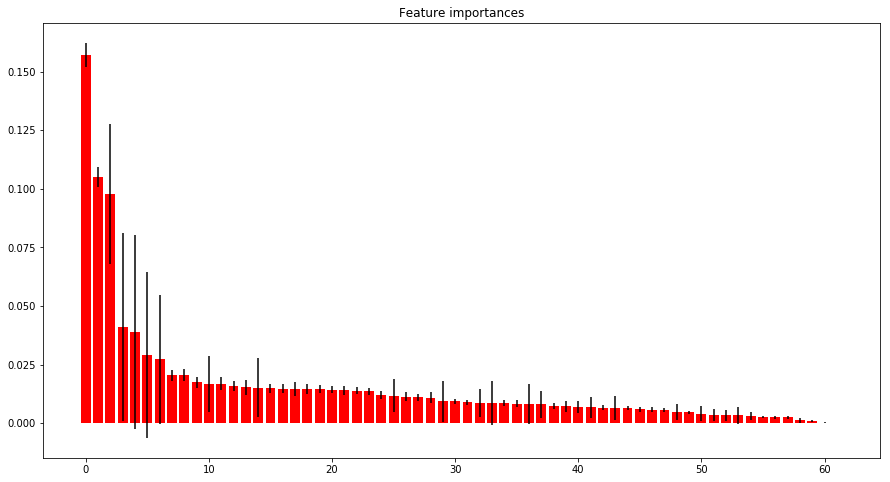

In [331]:
# Plot feature importances.

import numpy as np
import matplotlib.pyplot as plt

importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

for f in range(10):
    print("%d. %s (%f)" % (f + 1, X_df.columns.values[indices[f]],  importances[indices[f]]))

fig = plt.figure()
plt.title("Feature importances")
plt.bar(range(X_df.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
fig.set_size_inches(15,8)
axes = plt.gca()

plt.savefig("importances.png",bbox_inches='tight')

Normalized confusion matrix


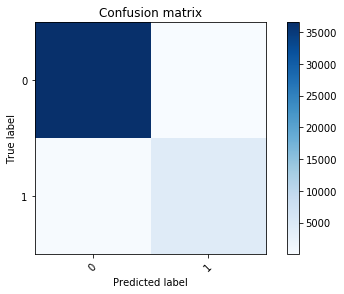

In [332]:
# Plot confusion matrix.

from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        t = "(%.2f)"%(cm[i, j])

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
y_pred = clf.predict(X)
cnf_matrix = confusion_matrix(y, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=range(len(set(y))), normalize = True,
                      title='Confusion matrix')

plt.savefig("confusion.png",bbox_inches='tight')